Cut-off frequency = 159.155 Hz
out


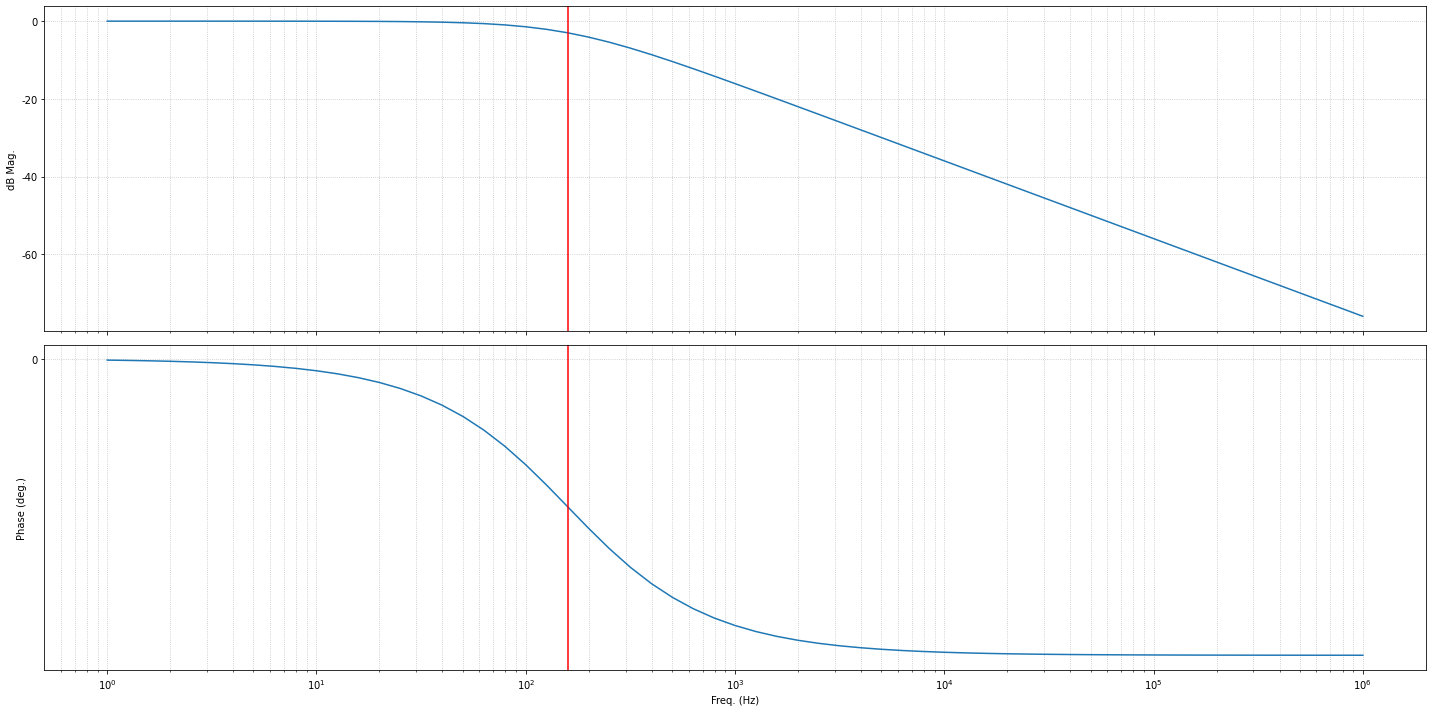

In [4]:

import math
import numpy as np
import matplotlib.pyplot as plt
import bode_utils

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

circuit = Circuit('Low-Pass RC Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(                  1,      'in', 'out', 1@u_kΩ)
C1 = circuit.C(                  1,      'out', circuit.gnd, 1@u_uF)


break_frequency = 1 / (2 * math.pi * float(R1.resistance * C1.capacitance))
print("Cut-off frequency = {:.3f} Hz".format(break_frequency))


simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=10,  variation='dec')


#r# We plot the Bode diagram.

figure = plt.figure(1, (20, 10))
plt.title("Bode Diagram of a Low-Pass RC Filter")
axes = (plt.subplot(211), plt.subplot(212))
"""bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
         )
"""

freq=analysis.frequency
dB=(20*np.log10(np.absolute(analysis.out)))
phase= np.angle(analysis.out)

bode_utils.bode_plot(freq, dB, phase, fignum=1, clear=False)
#bode_utils.bode_plot(freq, dB_theta, phase_theta, fignum=1, clear=False, label=label)

for axe in axes:
    axe.axvline(x=break_frequency, color='red')

plt.tight_layout()
plt.show()
